In [1]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf

%matplotlib inline

## Index and Crypto Historical Data

In [8]:
# Pull index historical data using yfinance API and save to csv
ticker = "^DJI" 
start= "1990-01-01" 
end= "2021-08-04"

history_df = yf.download(ticker, start=start, end=end, progress=False)
history_df = history_df.asfreq(freq='D').ffill().dropna()
history_df.to_csv('resources/dji_history.csv')

In [9]:
# Read in "Adj Close" and "Date" columns and rename column
sp_historical = pd.read_csv('resources/sp_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

# Rename column
sp_close = sp_historical.rename(columns={'Adj Close':'S&P_Close'})

# Calculate daily return 
sp_close['S&P_Daily_Ret'] = sp_close['S&P_Close'].pct_change()

# Select date range starting from 2015-08-08 to have the same starting date for all datasets
sp_close = sp_close.loc['2015-08-08':,:]
sp_close = sp_close.reset_index()
sp_close.head()

,Date,S&P_Close,S&P_Daily_Ret
0,2015-08-08,2077.570068,0.000000
1,2015-08-09,2077.570068,0.000000
2,2015-08-10,2104.179932,0.012808
3,2015-08-11,2084.070068,-0.009557
4,2015-08-12,2086.050049,0.000950


In [10]:
dji_historical = pd.read_csv('resources/dji_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

dji_close = dji_historical.rename(columns={'Adj Close':'DJI_Close'})
dji_close['DJI_Daily_Ret'] = dji_close['DJI_Close'].pct_change()

dji_close = dji_close.loc['2015-08-08':,:]
dji_close = dji_close.reset_index()
dji_close.head()

,Date,DJI_Close,DJI_Daily_Ret
0,2015-08-08,17373.380859,0.000000
1,2015-08-09,17373.380859,0.000000
2,2015-08-10,17615.169922,0.013917
3,2015-08-11,17402.839844,-0.012054
4,2015-08-12,17402.509766,-0.000019


In [11]:
ndx_historical = pd.read_csv('resources/ndx_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

ndx_close = ndx_historical.rename(columns={'Adj Close':'NDX_Close'})
ndx_close['NDX_Daily_Ret'] = ndx_close['NDX_Close'].pct_change()

ndx_close = ndx_close.loc['2015-08-08':,:]
ndx_close = ndx_close.reset_index()
ndx_close.head()

,Date,NDX_Close,NDX_Daily_Ret
0,2015-08-08,4520.080078,0.000000
1,2015-08-09,4520.080078,0.000000
2,2015-08-10,4573.109863,0.011732
3,2015-08-11,4513.990234,-0.012928
4,2015-08-12,4528.189941,0.003146


In [12]:
eth_historical = pd.read_csv('resources/ETH-USD.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

eth_close = eth_historical.rename(columns={'Adj Close':'ETH_Close'})
eth_close['ETH_Daily_Ret'] = eth_close['ETH_Close'].pct_change()

eth_close = eth_close.loc['2015-08-08':,:]
eth_close = eth_close.reset_index()
eth_close.head()

,Date,ETH_Close,ETH_Daily_Ret
0,2015-08-08,0.753325,-0.728249
1,2015-08-09,0.701897,-0.068268
2,2015-08-10,0.708448,0.009333
3,2015-08-11,1.067860,0.507323
4,2015-08-12,1.217440,0.140075


In [13]:
btc_historical = pd.read_csv('resources/BTC-USD.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

btc_close = btc_historical.rename(columns={'Adj Close':'BTC_Close'})
btc_close['BTC_Daily_Ret'] = btc_close['BTC_Close'].pct_change()

btc_close = btc_close.loc['2015-08-08':,:]
btc_close = btc_close.reset_index()
btc_close.head()

,Date,BTC_Close,BTC_Daily_Ret
0,2015-08-08,260.997009,-0.066484
1,2015-08-09,265.083008,0.015655
2,2015-08-10,264.470001,-0.002313
3,2015-08-11,270.385986,0.022369
4,2015-08-12,266.376007,-0.014831


In [14]:
# Concat Close prices into one Dataframe
combined_close = pd.concat([sp_close, dji_close, ndx_close, eth_close, btc_close], join='inner', axis=1)

# Remove duplicate "Date" columns
combined_close = combined_close.T.drop_duplicates().T

# Set "Date" as index and drop NaN
combined_close = combined_close.set_index('Date')
combined_close = combined_close.astype('float')
combined_close = combined_close.dropna()
combined_close.head()

,S&P_Close,S&P_Daily_Ret,DJI_Close,DJI_Daily_Ret,NDX_Close,NDX_Daily_Ret,ETH_Close,ETH_Daily_Ret,BTC_Close,BTC_Daily_Ret
Date,,,,,,,,,,
2015-08-08,2077.570068,0.000000,17373.380859,0.000000,4520.080078,0.000000,0.753325,-0.728249,260.997009,-0.066484
2015-08-09,2077.570068,0.000000,17373.380859,0.000000,4520.080078,0.000000,0.701897,-0.068268,265.083008,0.015655
2015-08-10,2104.179932,0.012808,17615.169922,0.013917,4573.109863,0.011732,0.708448,0.009333,264.470001,-0.002313
2015-08-11,2084.070068,-0.009557,17402.839844,-0.012054,4513.990234,-0.012928,1.067860,0.507323,270.385986,0.022369
2015-08-12,2086.050049,0.000950,17402.509766,-0.000019,4528.189941,0.003146,1.217440,0.140075,266.376007,-0.014831


## Returns Plot

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

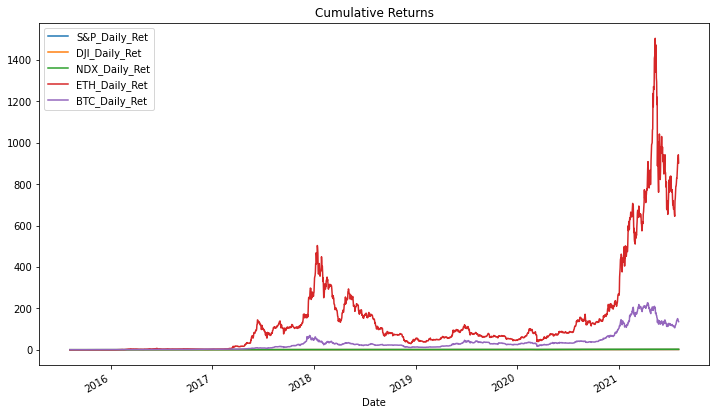

In [15]:
combined_return = combined_close[['S&P_Daily_Ret','DJI_Daily_Ret', 'NDX_Daily_Ret','ETH_Daily_Ret','BTC_Daily_Ret']]
cumulative_ret = (1+combined_return).cumprod()
cumulative_ret.plot(figsize=(12,7), title='Cumulative Returns')

In [19]:
# Cumulative return graph shows that BTC and ETH provided an investor with genereous returns from 2016-2021.

## Correlation Matrix

<Figure size 864x504 with 0 Axes>

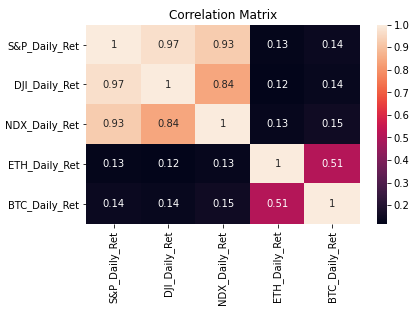

<Figure size 864x504 with 0 Axes>

In [16]:
corr = combined_return.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.subplots_adjust(left=0.20, right=0.99, bottom=0.30, top=0.99)
plt.figure(figsize=(12,7))

In [21]:
# Correlation matrix shows low correlation of cryptos and market indexes. This means they could be used as an effective diversifying asset class.

In [17]:
# Calculate standard dev of daily returns
combined_return_std = combined_return.std()
combined_return_std

S&P_Daily_Ret    0.009794
DJI_Daily_Ret    0.010154
NDX_Daily_Ret    0.011503
ETH_Daily_Ret    0.064753
BTC_Daily_Ret    0.039724
dtype: float64

## Risk Plot

<AxesSubplot:title={'center':'Asset Risk'}>

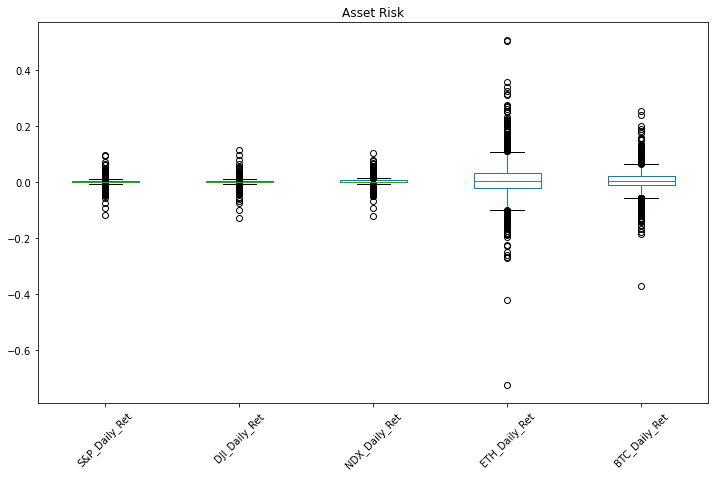

In [18]:
combined_return.plot.box(title="Asset Risk", rot=45, figsize=(12,7))

In [24]:
# Risk plot shows significant ETH and BTC return outliers compared to market indexes. 

In [19]:
# Annualized St Dev (cryptos are traded 365 days but here I assumed 252 days as with index data)
combined_annualized_std = combined_return_std * np.sqrt(252)
combined_annualized_std

S&P_Daily_Ret    0.155480
DJI_Daily_Ret    0.161182
NDX_Daily_Ret    0.182603
ETH_Daily_Ret    1.027927
BTC_Daily_Ret    0.630594
dtype: float64

In [20]:
# Calculate Sharpe Ratios (risk-adjusted returns)
combined_sharpe_ratios = (combined_return.mean() * 252) / (combined_return.std() * np.sqrt(252))
combined_sharpe_ratios

S&P_Daily_Ret    0.605556
DJI_Daily_Ret    0.557451
NDX_Daily_Ret    0.818600
ETH_Daily_Ret    1.302759
BTC_Daily_Ret    1.218687
dtype: float64

## Sharpe Ratio

<AxesSubplot:title={'center':'Sharpe Ratios'}, ylabel='Sharpe Ratio'>

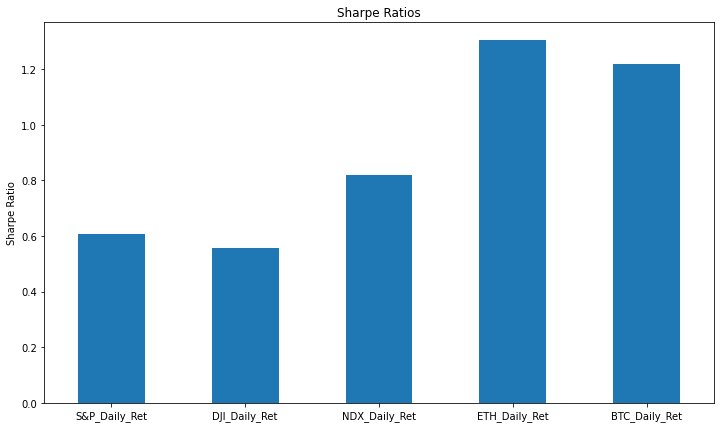

In [21]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(12,7), ylabel='Sharpe Ratio', rot=360)

In [28]:
# ETH and BTC more than compensated the investor for the risk taken compared to investing into market index from 2016-2021.

In [22]:
# Calculate Sortino Ratios (risk-adjusted returns)
combined_sortino_ratios = (combined_return.mean() * 252) / (combined_return[combined_return<0].std() * np.sqrt(252))
combined_sortino_ratios

S&P_Daily_Ret    0.566224
DJI_Daily_Ret    0.517095
NDX_Daily_Ret    0.807051
ETH_Daily_Ret    1.856125
BTC_Daily_Ret    1.584564
dtype: float64

## Sortino Ratio

<AxesSubplot:title={'center':'Sortino Ratios'}, ylabel='Sortino Ratio'>

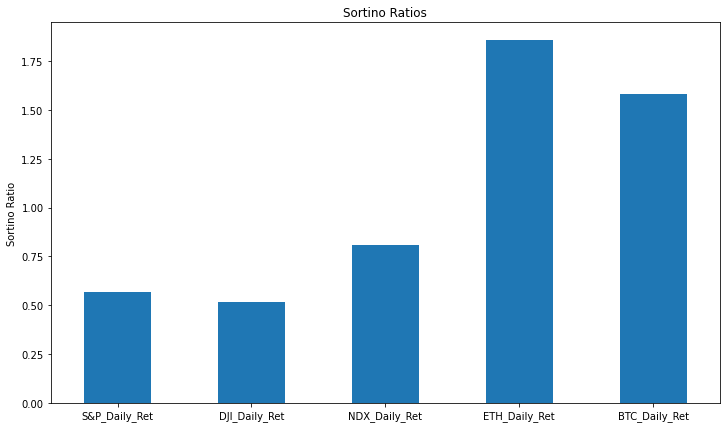

In [23]:
# Visualize the Sortino ratios as a bar plot
combined_sortino_ratios.plot(kind="bar", title="Sortino Ratios", figsize=(12,7), ylabel='Sortino Ratio', rot=360)

In [31]:
# Looking at Sortino ratio that considers downside risk also shows that ETH and then BTC compensated sufficiently an investor for the risk taken from 2016-2021.